## Titanic - Who will survive?

### Examine the data, there may be some anomalies in the data, and you will have to clean the data before you move forward to other tasks.

**Steps**:
- Load the dataset
- Display basic information and summary statistics
- Handle Missing Values:
  - Fill missing `Age` with the median age
  - Fill missing `Embarked` with 'S' since the majority of passengers embarked from Southampton
  - Drop the `Cabin` column due to a high number of missing values
- Removed outliers from the `Fare` and `Age` columns using the Z-score method, resulting in a more robust dataset for analysis

In [279]:
import pandas as pd
import numpy as np

# Load the training data set
titanic_data = pd.read_csv('train.csv')

# Display the first few rows of the training data
titanic_data.head()

# Display basic information about the dataset
# titanic_data.info()

# Check the number of rows in the DataFrame
num_rows = titanic_data.shape[0]
print(f"The number of rows in the dataset is: {num_rows}")

# Check for missing values
missing_values = titanic_data.isnull().sum()
# print(missing_values)

# Fill missing values for 'Age' with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with 'S'
titanic_data['Embarked'].fillna('S', inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verify no missing values remain
print(titanic_data.isnull().sum())


# Function to remove outliers based on Z-score
def remove_outliers_zscore(df, column, threshold=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_scores = (df[column] - mean) / std
    return df[np.abs(z_scores) < threshold]

# Remove outliers for 'Fare' using Z-score
titanic_data = remove_outliers_zscore(titanic_data, 'Fare')
# Remove outliers for 'Age' using Z-score
titanic_data = remove_outliers_zscore(titanic_data, 'Age')

# Display the shape of the dataset after removing outliers
print(f"The shape of the dataset after removing outliers is: {titanic_data.shape}")

The number of rows in the dataset is: 891
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
The shape of the dataset after removing outliers is: (864, 11)


### Encode features and split data
1. **Manually Encode Categorical Variables**:
   - The `Sex` column is encoded as:
     - 1 for 'male'
     - 0 for 'female'
   - The `Embarked` column is encoded as:
     - 0 for 'S' (Southampton)
     - 1 for 'C' (Cherbourg)
     - 2 for 'Q' (Queenstown)

2. **Split the Data**:
   - The data is split into training and testing sets using an 80-20 split.
   - The 'train_test_split' function is used with a random state of 42 to ensure reproducibility.


In [280]:
from sklearn.model_selection import train_test_split

# Manually create dummy variables for 'Sex'
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

# Manually create dummy variables for 'Embarked'
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# print(titanic_data.head())

# Define the feature columns and target column
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Split the data
X = titanic_data[features]
y = titanic_data[target]

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (691, 7), y_train: (691,)
Test set shape: X_test: (173, 7), y_test: (173,)


### Explore the Socio-Economic Status of the Passengers

In this section, we explore the relationship between the socio-economic status (represented by `Pclass`) of the passengers and other features such as age, gender, number of family members on board, fare and port of embarkation.

**Steps**
1. **Relationship between Socio-Economic Status and Age**:
   - Visualize the age distribution across different socio-economic statuses.

2. **Relationship between Socio-Economic Status and Gender**:
   - Visualize the gender distribution across different socio-economic statuses.

3. **Relationship between Socio-Economic Status and Number of Parents/Children on Board**:
   - Visualize the number of parents/children on board across different socio-economic statuses.

4. **Relationship between Socio-Economic Status and Port of Embarkation**:
   - Visualize the port of embarkation distribution across different socio-economic statuses.

5. **Relationship between Socio-Economic Status and Fare**:
   - Visualize the fare distribution across different socio-economic statuses.

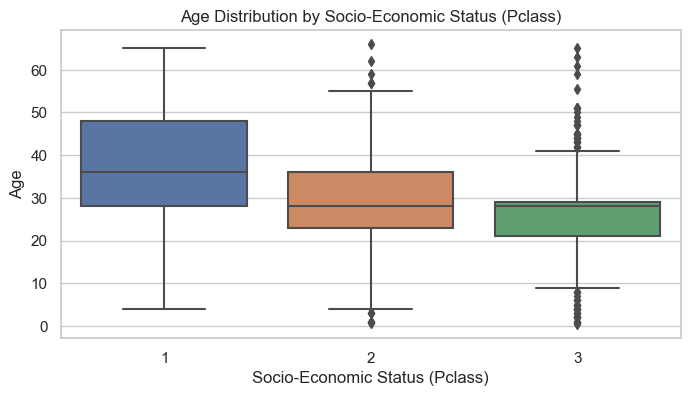

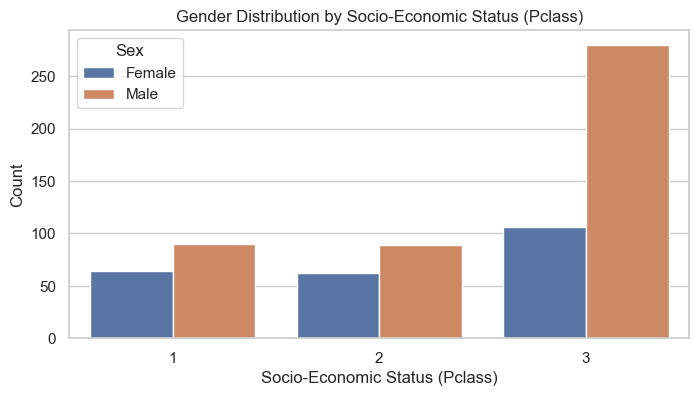

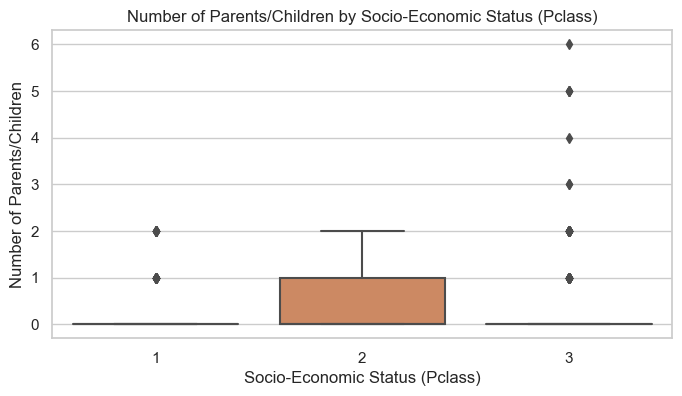

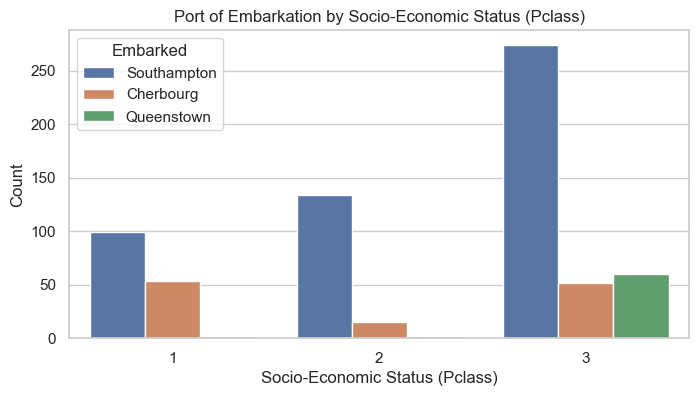

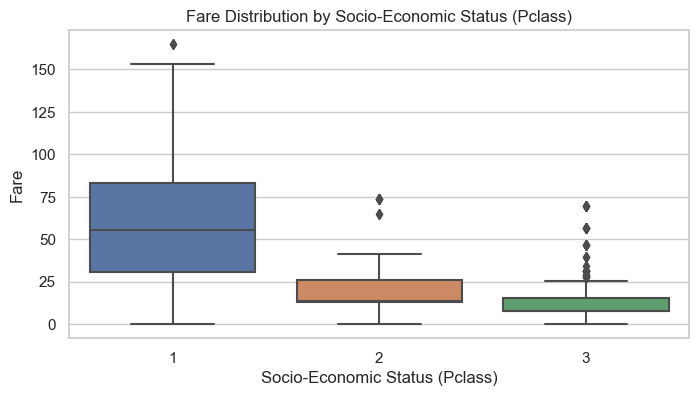

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between Socio-Economic Status and Age
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Age', data=X_train)
plt.title('Age Distribution by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Age')
plt.show()

# 2. Relationship between Socio-Economic Status and Gender
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Sex', data=X_train)
plt.title('Gender Distribution by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# 3. Relationship between Socio-Economic Status and Number of Parents/Children on Board
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Parch', data=X_train)
plt.title('Number of Parents/Children by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Number of Parents/Children')
plt.show()

# 4. Relationship between Socio-Economic Status and Port of Embarkation:
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Embarked', data=X_train)
plt.title('Port of Embarkation by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Count')
plt.legend(title='Embarked', labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

# 5. Relationship between Socio-Economic Status and Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Fare', data=X_train)
plt.title('Fare Distribution by Socio-Economic Status (Pclass)')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Fare')
plt.show()

#### Findings
1. **Age Distribution**:
    - The age distribution across different socio-economic statuses shows that upper-class passengers (Pclass 1) are mostly older compared to middle-class and lower-class passengers.
2. **Gender Distribution**:
    - The gender distribution shows a higher number of male passengers across all classes, with the most in the lower class (Pclass 3).
3. **Number of Parents/Children on Board**:
    - The number of parents/children varies, with middle-class passengers tending to travel with more parents/children.

4. **Port of Embarkation**:
    - The port of embarkation distribution shows most passengers from Queenstown were lower-class, and also Cherbourg had a higher proportion of upper and lower-class passengers.
5. **Fare Distribution**:
    - The fare distribution shows that upper-class passengers paid significantly higher fares compared others which is expected.

### Explore the Distribution of Survival Victims

In this section, we explore the distribution of survival victims in relation to key features such as age, gender, socio-economic class (Pclass), and number of family members on board.

1. **Relationship between Survival and Age**:
   - Visualize the age distribution of survivors and non-survivors.

2. **Relationship between Survival and Gender**:
   - Visualize the gender distribution of survivors and non-survivors.

3. **Relationship between Survival and Socio-Economic Class (Pclass)**:
   - Visualize the socio-economic class distribution of survivors and non-survivors.

4. **Relationship between Survival and Number of Family Members on Board**:
   - Visualize the number of siblings/spouses and parents/children on board for survivors and non-survivors.

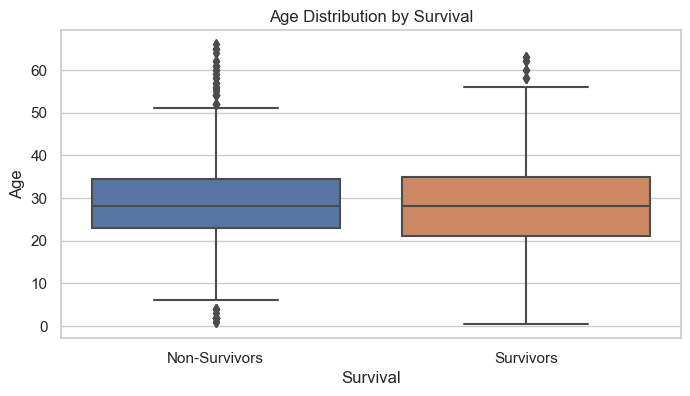

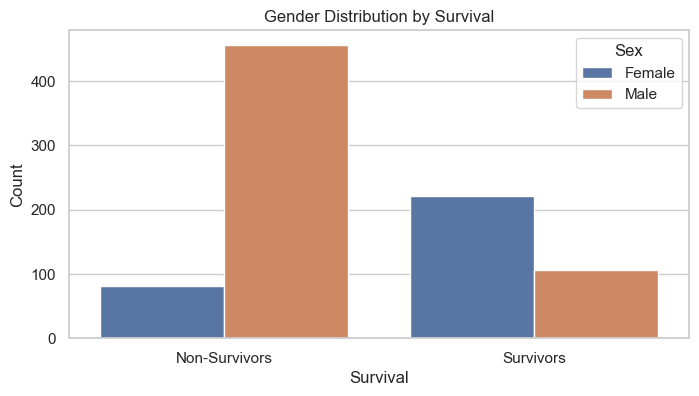

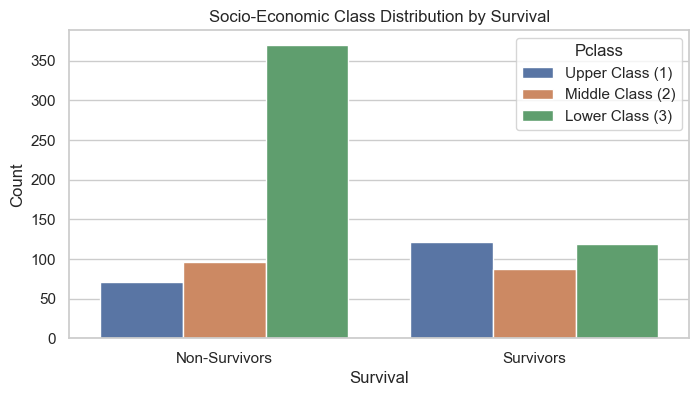

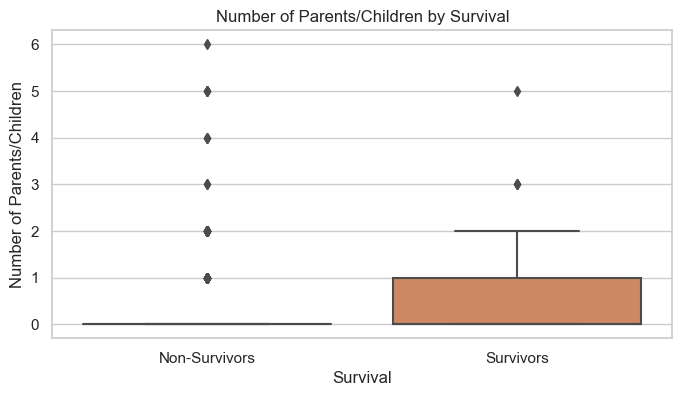

In [282]:
# 1. Relationship between Survival and Age
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

# 2. Relationship between Survival and Gender
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Gender Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# 3. Relationship between Survival and Socio-Economic Class (Pclass)
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Socio-Economic Class Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.legend(title='Pclass', labels=['Upper Class (1)', 'Middle Class (2)', 'Lower Class (3)'])
plt.show()

# 4. Relationship between Survival and Number of Parents/Children on Board
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Parch', data=titanic_data)
plt.title('Number of Parents/Children by Survival')
plt.xlabel('Survival')
plt.ylabel('Number of Parents/Children')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

#### Findings
1. **Age Distribution**:
    - The age distribution indicates a trend that younger passengers might have had a higher chance of survival, but age was not the sole determining factor.
2. **Gender Distribution**:
    - The gender distribution indicates that a higher proportion of female passengers survived compared to male passengers, also a significantly higher proportion of male passengers couldn't survive.
3. **Socio-Economic Class (Pclass)**:
    - The socio-economic class distribution shows that upper-class passengers had a significantly higher survival rate compared to middle and lower-class passengers.
4. **Number of Family Members on Board**:
    - The distribution suggests that having at least one parent or child on board might have been associated with a higher likelihood of survival.

### Correlation Analysis

In this section, we analyze the correlations between various features and the target variable (`Survived`) to identify the most important features for predicting survival on the Titanic.

**Calculate and Visualize the Correlation Matrix**:
   - Calculate the correlation matrix.
   - Visualize the correlation matrix using a heatmap.


/var/folders/g7/gltvrq8j0gv1s2cznm6jk0r80000gn/T/ipykernel_43149/2099738970.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


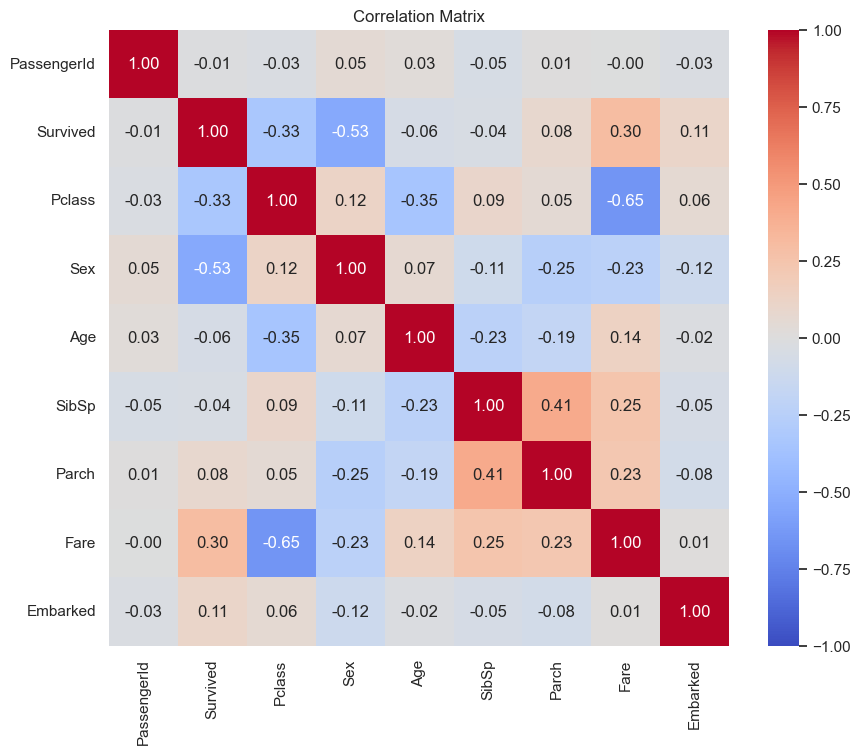

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = titanic_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Title and labels
plt.title('Correlation Matrix')
plt.show()


#### Findings
**Survived**:

- Pclass: Correlation coefficient of -0.33. This indicates a moderate negative correlation with survival, suggesting that passengers in higher socio-economic classes (lower Pclass value) were more likely to survive.
- Sex: Correlation coefficient of -0.53. This indicates a strong negative correlation with survival, meaning that females were more likely to survive.
- Fare: Correlation coefficient of 0.30. This shows some positive correlation with survival, meaning passengers who paid higher fares had a higher chance of survival.

### 1. Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes (such as survival or not). It estimates the probability that an instance belongs to a particular class (e.g., survived) using a logistic function. The output is a probability value between 0 and 1. If the probability is greater than 0.5, the model classifies the instance as the positive class; otherwise, it classifies it as the negative class.



In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Logistic Regression Accuracy: 0.7341040462427746
Precision: 0.7014925373134329
Recall: 0.6438356164383562
F1-Score: 0.6714285714285715


#### Findings

**Evaluate the Performance of Logistic Regression Model**
- **Accuracy**: 0.734 (73.4% correct predictions)
- **Precision**: 0.701 (70.1% of predicted survivors were actual survivors)
- **Recall**: 0.643 (64.4% of actual survivors were correctly identified)
- **F1-Score**: 0.671 (balance between precision and recall)

**Reasons for Potentially Inaccurate Predictions**
- **Feature Limitations**: Important features might be missing
- **Non-Linearity**: The relationship between features and survival might not be linear
- **Data Imbalance**: There may be more non-survivors than survivors


### 2. Nearest Neighbor Methods
K-Nearest Neighbors (KNN) is an algorithm used for classification and regression that stores all training data and, during prediction, calculates the distance between the test instance and all training instances to identify the k-nearest neighbors, assigning the most common class among these neighbors for classification or the average value for regression.

In [285]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)


KNN Accuracy: 0.7225433526011561
Precision: 0.8205128205128205
Recall: 0.4383561643835616
F1-Score: 0.5714285714285714


#### Findings

**Evaluate the Performance of K-Nearest Neighbors (KNN) Model**
- **Accuracy**: 0.722 (72.2% correct predictions)
- **Precision**: 0.820 82% of predicted survivors were actual survivors)
- **Recall**: 0.438 (43.8% of actual survivors were correctly identified)
- **F1-Score**: 0.571 (balance between precision and recall)

**Reasons for Potentially Inaccurate Predictions**
- **Feature Limitations**: Important features might be missing.
- **Non-Linearity**: KNN can capture non-linear relationships.
- **Data Imbalance**: There may be more non-survivors than survivors.


The KNN model achieved a lower accuracy compared to the Logistic Regression model. The precision is relatively high, but recall is lower, indicating that the model might not be identifying all actual survivors effectively.

### 3. Random Forest Model
Random Forest is an ensemble learning algorithm that builds multiple decision trees using random subsets of the training data and features. For classification tasks, it makes predictions by taking the majority vote from all the trees. This approach improves accuracy and robustness by reducing overfitting and handling non-linear relationships effectively.

In [286]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

Random Forest Accuracy: 0.791907514450867
Precision: 0.7534246575342466
Recall: 0.7534246575342466
F1-Score: 0.7534246575342466


#### Findings

**Evaluate the Performance of Random Forest Model**
- **Accuracy**: 0.792 (79.2% correct predictions)
- **Precision**: 0.753 (75.3% of predicted survivors were actual survivors)
- **Recall**: 0.753 (75.3% of actual survivors were correctly identified)
- **F1-Score**: 0.753 (balance between precision and recall)

**Summary**
- The Random Forest model achieved a higher accuracy compared to Logistic Regression and K-Nearest Neighbors models.
- The F1-Score further confirms that the model has a good balance between precision and recall, making it a reliable choice for predicting survival on the Titanic.


### Visualization comparing the results from the 3 models

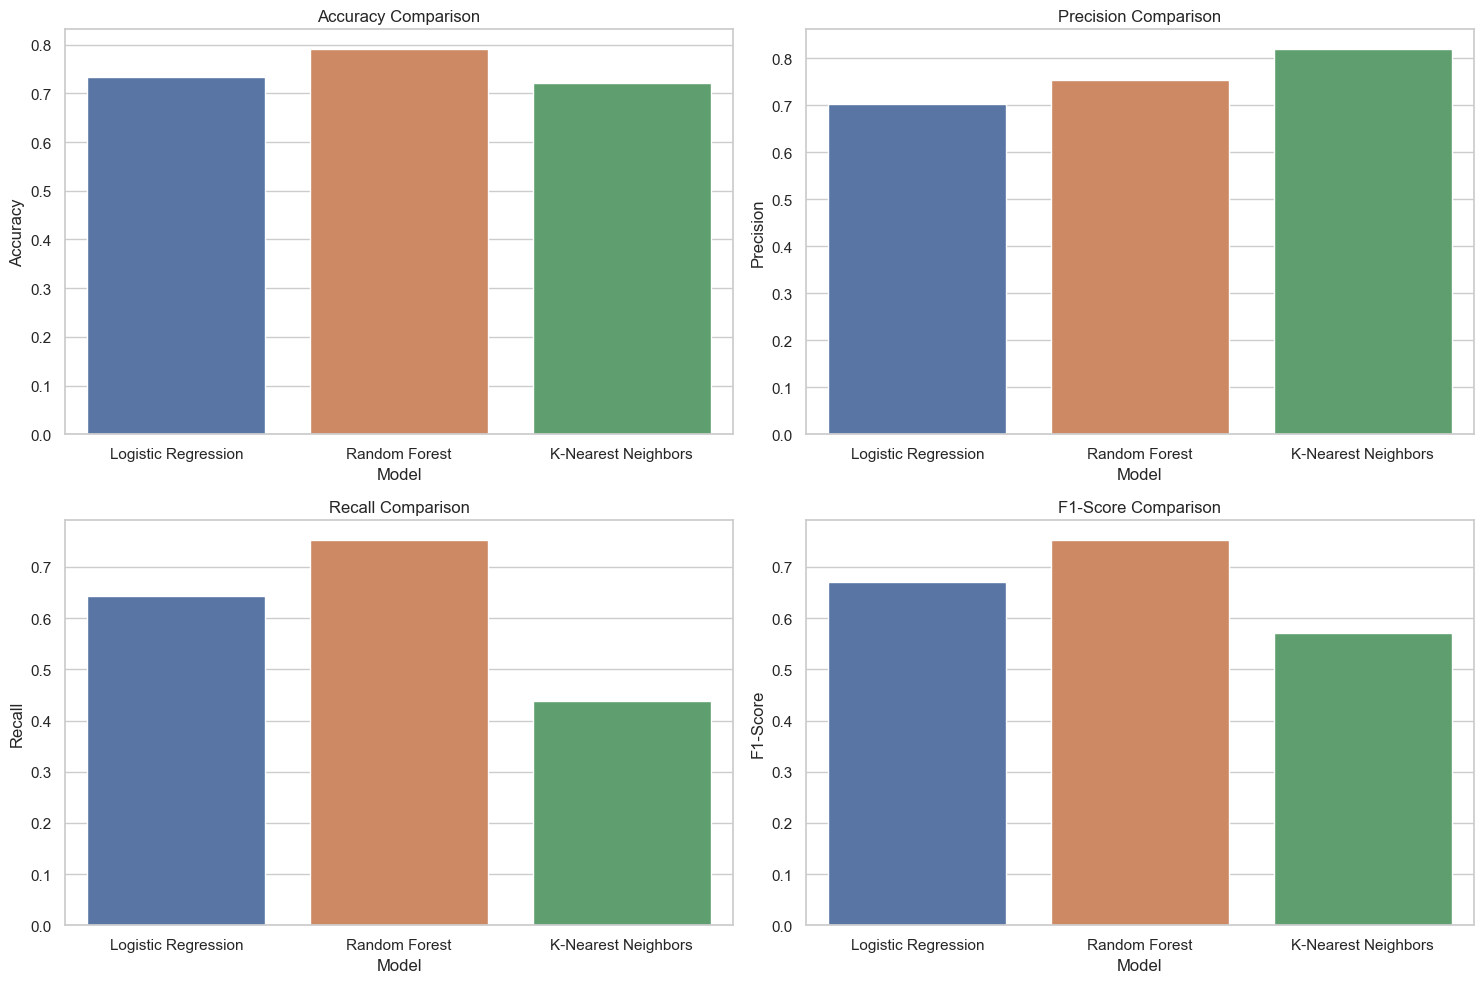

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Store the results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [0.7341, 0.7919, 0.722],  # Replace with actual results
    'Precision': [0.7014, 0.7534, 0.820],
    'Recall': [0.6438, 0.7534, 0.438],
    'F1-Score': [0.6714, 0.7534, 0.571]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Create a bar plot for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')

# Precision
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')

# Recall
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison')

# F1-Score
sns.barplot(x='Model', y='F1-Score', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('F1-Score Comparison')

# Improve layout
plt.tight_layout()
plt.show()


### Logistic Regression with Cross-Validation
Steps:
    
1. **Further Split the Training Data**:
    - The initial training data was further split into a new training set and a validation set to ensure better generalization.
2. **Train a new Logistic Regression Model**:
    - A Logistic Regression model was trained on the new training set.
3. **Evaluate on the Validation Set**:
    - The model was evaluated on the validation set to check its performance.
4. **Predict on the Test Set**:
    - Predictions were made on the test set using the trained model.
5. **Evaluate the Model**:
    - The performance of the model was evaluated on the test set using accuracy, precision, recall, and F1-score.

Validation Accuracy: 0.8092485549132948
Logistic Regression Test Accuracy: 0.7456647398843931
Precision: 0.7230769230769231
Recall: 0.6438356164383562
F1-Score: 0.6811594202898551


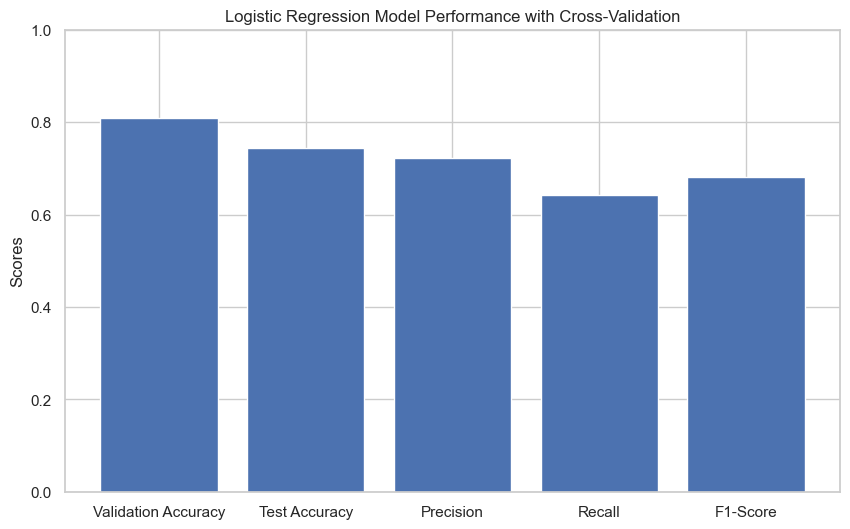

In [288]:

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = logreg.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Predict on the test set
y_test_pred = logreg.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Logistic Regression Test Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

import matplotlib.pyplot as plt

# Results
metrics = ['Validation Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.809, 0.745, 0.723, 0.643, 0.681]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.ylabel('Scores')
plt.title('Logistic Regression Model Performance with Cross-Validation')
plt.show()


#### Findings

**Evaluate the Performance of Logistic Regression Model with Cross-Validation**
- **Validation Accuracy**: 0.809 (80.9% correct predictions on the validation set)
- **Test Accuracy**: 0.745 (74.5% correct predictions on the test set)
- **Precision**: 0.723 (72.3% of predicted survivors were actual survivors)
- **Recall**: 0.643 (64.3% of actual survivors were correctly identified)
- **F1-Score**: 0.681 (balance between precision and recall)

**Conclusion**
- Cross-validation improved the test accuracy, precision and F1-score very slightly.
- The model's precision improved, but recall slightly decreased, suggesting a focus on correctly identifying survivors at the cost of missing some actual survivors.


### Conclusion

The Random Forest model demonstrated superior performance in predicting Titanic survival, making it the best choice among the models tested. It effectively handled the non-linear relationships and interactions within the data, providing well-balanced well-balanced precision, recall, and F1-score. Notably, KNN had the highest precision among all the models.